# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np
import pandas as pd
import random

from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp_df = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp_df)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
print(f"\n \n The first two columns are strings, while the third is a float",temp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes

 
 The first two columns are strings, while the third is a float None


- The first two columns are strings, while the third is a float

#### Select the rows where state is New York

In [5]:
new_york = temp_df[temp_df['State'] == 'New York']
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
avg_ny = new_york['Temperature'].mean()
print("\n The average temperature of the New York cities is", round(avg_ny,2))


 The average temperature of the New York cities is 10.74


#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
more_than_15_ce = temp_df[temp_df['Temperature'] >= 15]
more_than_15_ce

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
more_than_15_ce['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
two_conditions = temp_df[(temp_df['Temperature'] >= 15) & (temp_df['Temperature'] < 20) ]
two_conditions

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
result = temp_df.groupby(['State'], as_index=False).agg({'Temperature':['mean','std']})
result

State Temperature          
                      mean       std
0  Connecticut   15.833333  1.964186
1   New Jersey   21.111111  1.571348
2     New York   10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
employee_df = pd.read_csv('Employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [52]:
print("As in the last df, the first columns are strings, while the last two are int since both are numeric \n We could change years datatype if needed",employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes
As in the last df, the first columns are strings, while the last two are int since both are numeric 
 We could change years datatype if needed None


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

- As seen in the histogram below, more than 50% of the employees have been between 0 and 3 years

<AxesSubplot:>

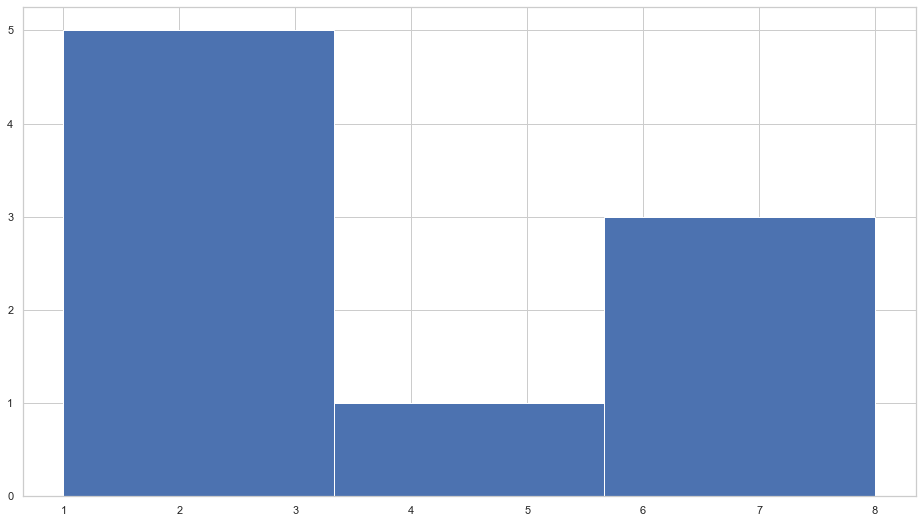

In [67]:
employee_df.Years.hist(bins=3)

- The distribution of the salaries is more equial than the histogram above

<AxesSubplot:>

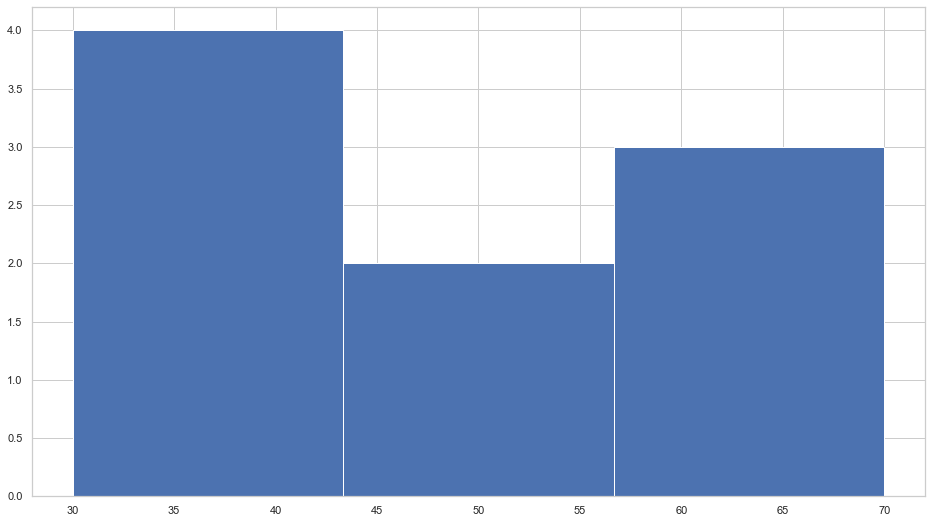

In [70]:
employee_df.Salary.hist(bins=3)

#### What's the average salary in this company?

In [73]:
avg_salary = employee_df['Salary'].mean()
print(f'The average salary is {round(avg_salary,2)}')

The average salary is 48.89


#### What's the highest salary?

In [74]:
max_salary = employee_df['Salary'].max()
print(f'The highest salary is {round(max_salary,2)}')

The highest salary is 70


#### What's the lowest salary?

In [75]:
min_salary = employee_df['Salary'].min()
print(f'The lowest salary is {round(min_salary,2)}')

The lowest salary is 30


#### Who are the employees with the lowest salary?

In [76]:
employees_low = employee_df[employee_df['Salary'] == min_salary]
employees_low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [77]:
david = employee_df[employee_df['Name'] == 'David']
david



,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [78]:
david['Salary']

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [79]:
print(employee_df[employee_df['Title'] == 'associate'])


     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [80]:
employee_df.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [81]:
print(employee_df.iloc[0:3])

    Name Department Education Gender    Title  Years  Salary
0   Jose         IT  Bachelor      M  analyst      1      35
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### Find the employees who's title is associate and the salary above 55?

In [82]:
print(employee_df[(employee_df['Title'] == 'associate') & (employee_df['Salary'] > 55)])

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [83]:
years_group = employee_df.groupby(['Years'], as_index=False).agg({'Salary':'mean'})
years_group

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [84]:
title_group = employee_df.groupby(['Title'], as_index=False).agg({'Salary':'mean'})
title_group

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:>

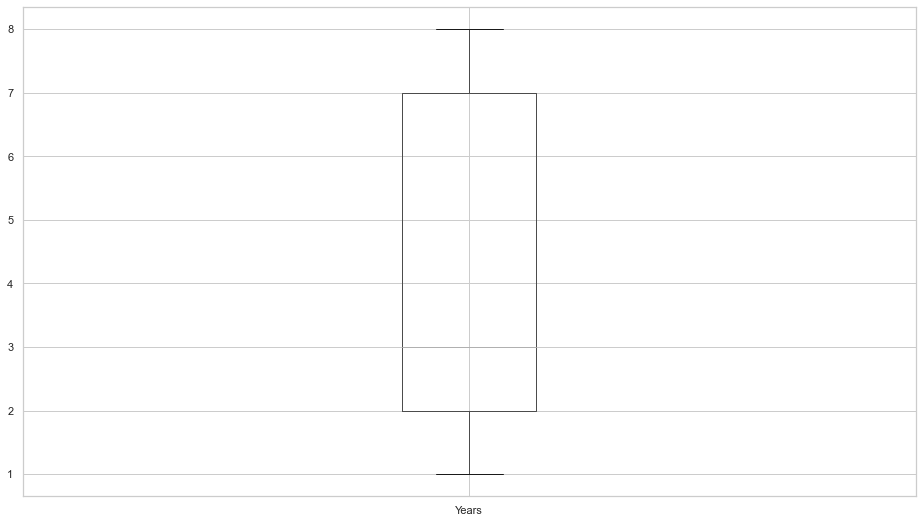

In [92]:


employee_df.boxplot('Years')

<AxesSubplot:>

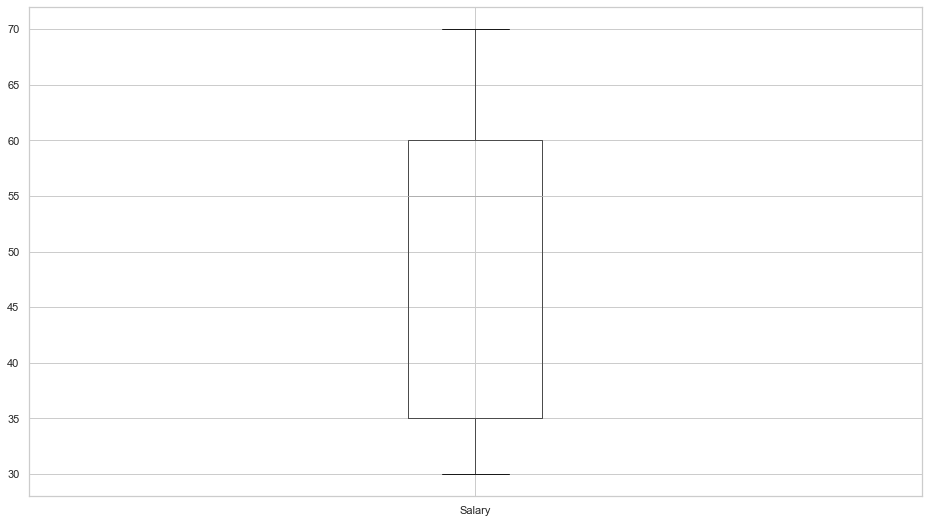

In [93]:
employee_df.boxplot('Salary')

In [95]:
employee_df.Salary.quantile(0.25)


35.0

In [96]:
employee_df.Salary.quantile(0.75)


60.0

#### Is the mean salary per gender different?

In [97]:
gender_group = employee_df.groupby(['Gender'], as_index=False).agg({'Salary':'mean'})
gender_group

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [98]:
dept_group = employee_df.groupby(['Department'], as_index=False).agg({'Salary':{'min','mean','max'}})
dept_group

Department Salary        
               mean min max
0         HR  45.00  30  70
1         IT  48.75  30  70
2      Sales  55.00  55  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [101]:
orders_df = pd.read_csv("Orders.zip")


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [104]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [34]:
# your answer here

####  What is the average Purchase Price?

In [106]:
print("Avg purchase price: ",orders_df['amount_spent'].mean())

Avg purchase price:  22.39474850474768


#### What were the highest and lowest purchase prices? 

In [107]:
print("Max purchase price: ",orders_df['amount_spent'].max())

Max purchase price:  168469.6


In [108]:
print("Min purchase price: ",orders_df['amount_spent'].min())

Min purchase price:  0.0


#### Select all the customers we have in Spain

In [109]:
orders_df.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [111]:
spain = orders_df[orders_df['Country'] == 'Spain']
spain

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [116]:
spain.Country.value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [140]:
good_customers = orders_df.groupby(['CustomerID']).agg({'Quantity': 'sum'}).reset_index()
#good_customers = good_customers.reset_index(inplace=True)
#good_customers.sort_values(by=['InvoiceNo'])

#filtered = good_customers[good_customers['Quantity'] > 50]
#filtered
good_customers

,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4334,18280,45
4335,18281,54
4336,18282,103
4337,18283,1397


In [142]:
filtered = good_customers[good_customers['Quantity'] > 50]
filtered


,CustomerID,Quantity
0,12346,74215
1,12347,2458
2,12348,2341
3,12349,631
4,12350,197
...,...,...
4333,18278,66
4335,18281,54
4336,18282,103
4337,18283,1397


In [126]:
orders_df.shape

(397924, 14)

#### Select orders from Spain that are above 50 items

In [144]:
spain_50 = spain[spain['Quantity'] > 50] 
spain_50.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [146]:
free_df = orders_df[orders_df['amount_spent'] == 0]
free_df.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [157]:
#lunch_df = orders_df[orders_df['Description'].str_contains('lunch bag')]
#lunch_df

# df['col'].str.contains('partial_string').any()

result_3 = orders_df[orders_df['Description'].str.contains('lunch bag')]
result_3


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [159]:
result_4 = orders_df[(orders_df['Description'].str.contains('lunch bag')) & (orders_df['year'] == 2010)]
result_4.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:>

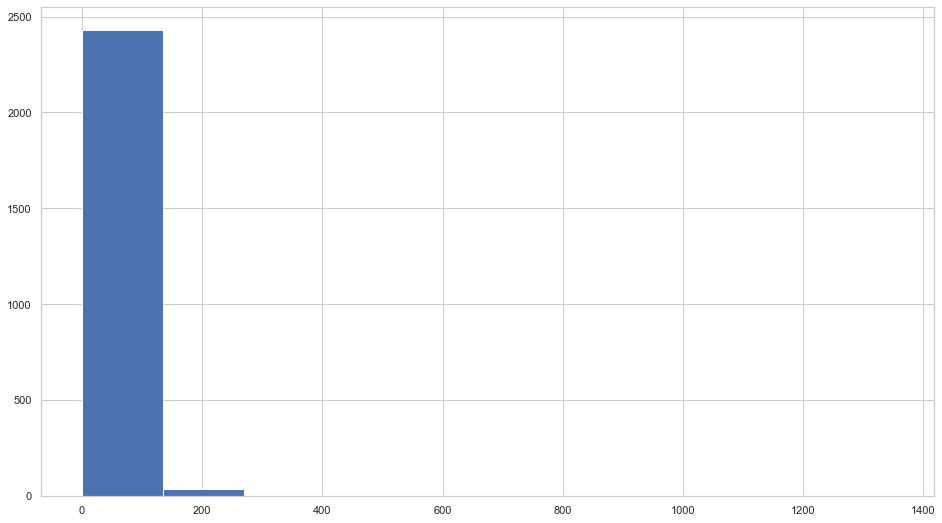

In [167]:
# spain['amount_spent'].hist(bins=4)
spain['amount_spent'].hist()


#### Select all orders made in the month of August

In [169]:
aug_orders = orders_df[orders_df['month'] == 7]
aug_orders.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
172648,245903,558638,84836,2011,7,5,8,zinc metal heart decoration,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00
172649,245904,558638,71459,2011,7,5,8,hanging jam jar t-light holder,24,2011-07-01 08:16:00,0.85,16317,United Kingdom,20.40
172650,245905,558638,22784,2011,7,5,8,lantern cream gazebo,3,2011-07-01 08:16:00,4.95,16317,United Kingdom,14.85
172651,245906,558638,23145,2011,7,5,8,zinc t-light holder star large,12,2011-07-01 08:16:00,0.95,16317,United Kingdom,11.40
172652,245907,558638,22674,2011,7,5,8,french toilet sign blue metal,12,2011-07-01 08:16:00,1.25,16317,United Kingdom,15.00


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [179]:
country_aug = aug_orders.groupby(['Country']).agg({'InvoiceNo': 'nunique'}).reset_index().sort_values(by='InvoiceNo', ascending=False)
country_aug.head(5)

,Country,InvoiceNo
22,United Kingdom,1200
9,Germany,33
5,EIRE,22
8,France,22
19,Spain,9


#### What's the  average amount of money spent by country

In [182]:
avg_spent = orders_df.groupby(['Country']).agg({'amount_spent': 'mean'}).reset_index().sort_values(by='amount_spent', ascending=False)
avg_spent.head(5)

,Country,amount_spent
23,Netherlands,120.798282
0,Australia,116.895620
19,Japan,116.561900
29,Singapore,95.852658
31,Sweden,85.096075


#### What's the most expensive item?

In [189]:
orders_df_2 = orders_df[orders_df['Description'] != 'postage']

most_expensive_item = orders_df_2[(orders_df_2['UnitPrice'] == orders_df_2['UnitPrice'].max()) & (orders_df_2['Description'] != 'postage')]
most_expensive_item[['Description','UnitPrice']]


,Description,UnitPrice
308822,manual,4161.06
308846,manual,4161.06


#### What was the average amount spent per year ?

In [193]:
avg_spent_year = orders_df.groupby(['year']).agg({'amount_spent': 'mean'}).reset_index().sort_values(by='amount_spent', ascending=False)
avg_spent_year.head(5)

,year,amount_spent
1,2011,22.430074
0,2010,21.892733
